---

### Programming Assignment 1: ***Exploratory Data Analysis***
# <span style="color:#1DB954;">**MOST STREAMED SPOTIFY SONGS 2023**</span> <img src="spotify_logo.png" style="width:100px; height:100px; vertical-align:middle;">
#### Group Members:
**Bolinas**, Denisse Roxanne H.  
**De Leola**, Miguel S.  
**Ugates**, John Rhey T.  

 
---


#### *Importing Necessary Libraries*

---

In [942]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

spotify_df = pd.read_csv("spotify_2023.csv", engine='python', encoding="ISO-8859-1")

---

### **1. Overview of the Dataset**

In [943]:
pd.pandas.set_option('display.max_columns', None) #"None" Removes the limit on how many columns can be shown
spotify_df.head() #Displays the first 5 rows of the dataframe

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


#### ***How many rows and columns does the dataset contain?***

In [944]:
num_rows, num_columns = spotify_df.shape #Returns the dimensions of the dataframe as a tuple
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 953
Number of Columns: 24


#### ***What are the data types of each column? Are there any missing values?***

##### **Data types of each column:**

In [945]:
print(spotify_df.dtypes) #Returns the data type of each column


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


##### **Number of missing values:**

In [946]:
missing_values = spotify_df.isnull().sum() #Counts missing values per column
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


**Converting to the Appropriate Data Type**

In [947]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce').fillna(0).astype(int) #Converts values in the 'streams' column to integers
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'], errors='coerce').fillna(0).astype(int) #Converts values in the 'in_deezer_playlists' column to integers
spotify_df['in_shazam_charts'] = pd.to_numeric(spotify_df['in_shazam_charts'], errors='coerce').fillna(0).astype(int) #Converts values in the 'in_shazam_charts' column to integers
print(spotify_df.dtypes) #Returns the data type of each column

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


**Dealing with Missing Values**

In [948]:
#Fill missing values in 'in_shazam_charts' column with the mean
imp = SimpleImputer(strategy='mean')
spotify_df['in_shazam_charts'] = imp.fit_transform(spotify_df['in_shazam_charts'].values.reshape(-1, 1))

# Fill missing values in 'key' column with the most frequent value and convert to 1D array
imp = SimpleImputer(strategy='most_frequent')
spotify_df['key'] = imp.fit_transform(spotify_df['key'].values.reshape(-1, 1)).ravel()
print(spotify_df.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


---

### **2. Basic Descriptive Statistics**

#### ***What are the mean, median, and standard deviation of the streams column?***

In [949]:
#Mean
mean_value = spotify_df['streams'].mean()
print(f"Mean: {mean_value:,}") #":," Adds commas as thousands separators to numbers

#Median
median_value = spotify_df['streams'].median()
print(f"Median: {median_value:,}")

#Standard Deviation
std_value = spotify_df['streams'].std()
print(f"Standard Deviation: {std_value:,}")

Mean: 513,597,931.3137461
Median: 290,228,626.0
Standard Deviation: 566,803,887.0588315


#### ***What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?***

##### **Distribution of Released Year:**

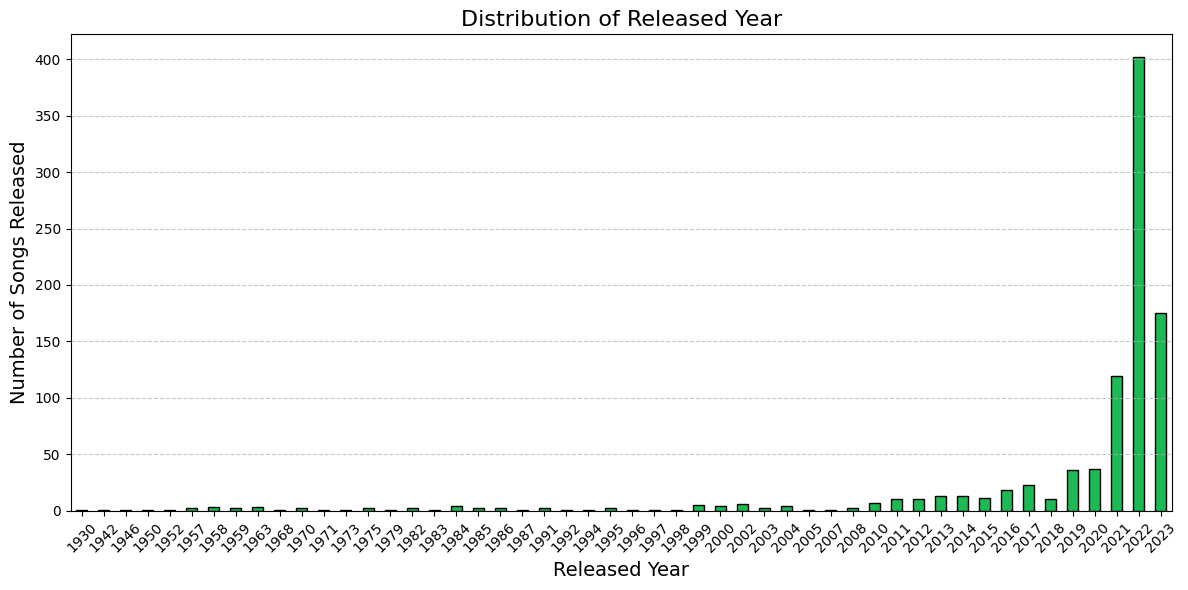

In [950]:
#Group by released_year and count the number of songs
d_released_year = spotify_df.groupby('released_year')['track_name'].count()

#Create the bar plot
plt.figure(figsize=(12, 6))
d_released_year.plot(kind='bar', color='#1DB954', edgecolor='black')

#Add labels and title
plt.xlabel('Released Year', fontsize=14) 
plt.ylabel('Number of Songs Released', fontsize=14)
plt.title('Distribution of Released Year', fontsize=16)

#Improve x-ticks visibility
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

#Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


##### **Distribution of Artist Count:**

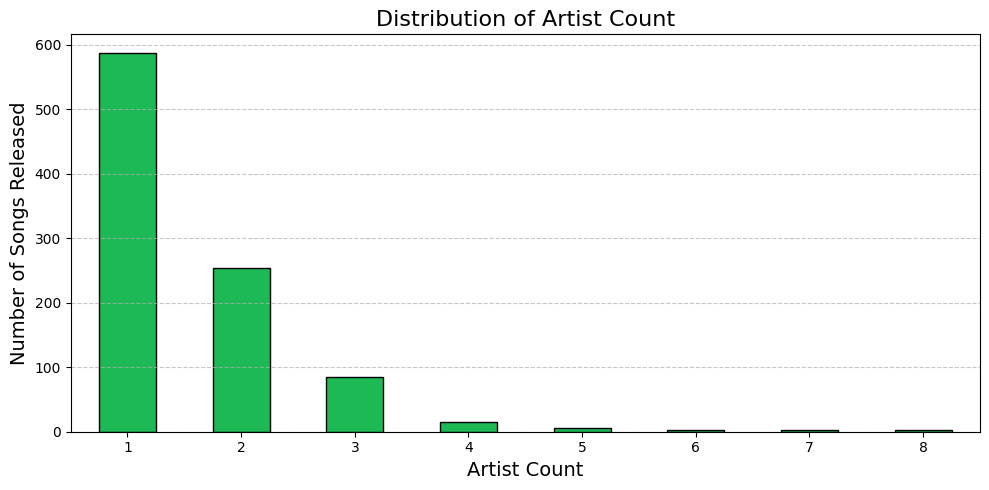

In [951]:
#Group by artist_count and count the number of songs
d_artist_count = spotify_df.groupby('artist_count')['track_name'].count()

#Create the bar plot
plt.figure(figsize=(10, 5))
d_artist_count.plot(kind='bar', color='#1DB954', edgecolor='black')

#Add labels and title
plt.xlabel('Artist Count', fontsize=14)
plt.ylabel('Number of Songs Released', fontsize=14)
plt.title('Distribution of Artist Count', fontsize=16)

#Improve x-ticks visibility
plt.xticks(rotation=360)  #Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  #Add gridlines for better readability

#Show the plot
plt.tight_layout()  #Adjust layout to prevent clipping of tick-labels
plt.show()

### **3. Top Performers**






#### ***Which track has the highest number of streams? Display the top 5 most streamed tracks.***

In [952]:
# Sort the DataFrame by the 'streams' column in descending order again
top_5_streamed_tracks = spotify_df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

# Display the top 5 most streamed tracks
print(top_5_streamed_tracks)    

                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

        streams  
55   3703895074  
179  3562543890  
86   2887241814  
620  2864791672  
41   2808096550  


#### ***Who are the top 5 most frequent artists based on the number of tracks in the dataset?*** 

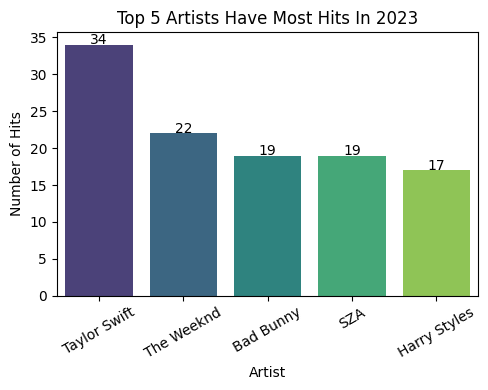

In [953]:
# Count the number of songs released by each artist
artist_counts = spotify_df['artist(s)_name'].value_counts()

# Select the top 5 artists
top_artists = artist_counts.head(5)

# Create the barplot
plt.figure(figsize=(5, 4))
ax = sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')

# Add exact numbers on top of each bar
for index, value in enumerate(top_artists.values):
    ax.text(index, value + .1, str(value), ha='center', fontweight='light')

# Customize plot
plt.title('Top 5 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=30)
plt.tight_layout()

# Show the plot
plt.show()

---

### **4. Temporal Trends** 

#### ***Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.*** 


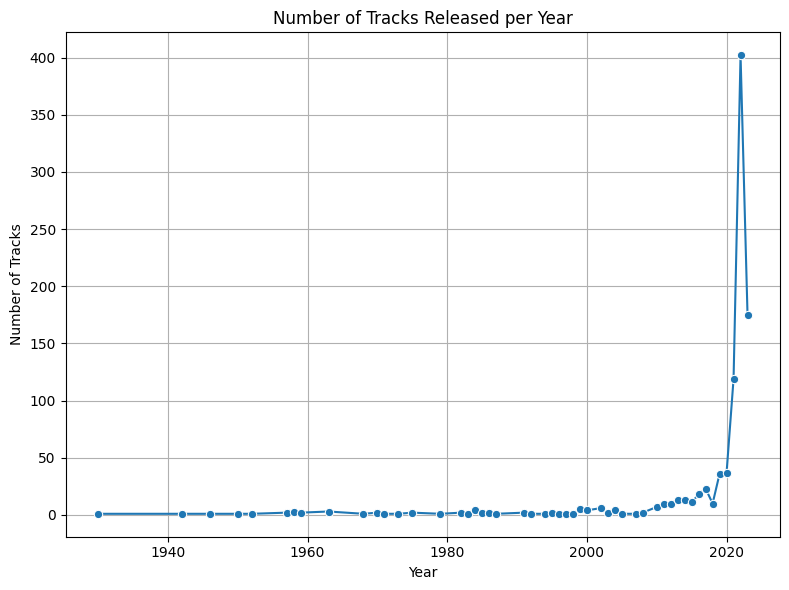

In [954]:
# Assuming the dataset is loaded into a DataFrame called spotify_df
# Count the number of tracks released per year
tracks_per_year = spotify_df['released_year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker='o')

# Customize plot
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

#### ***Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?***

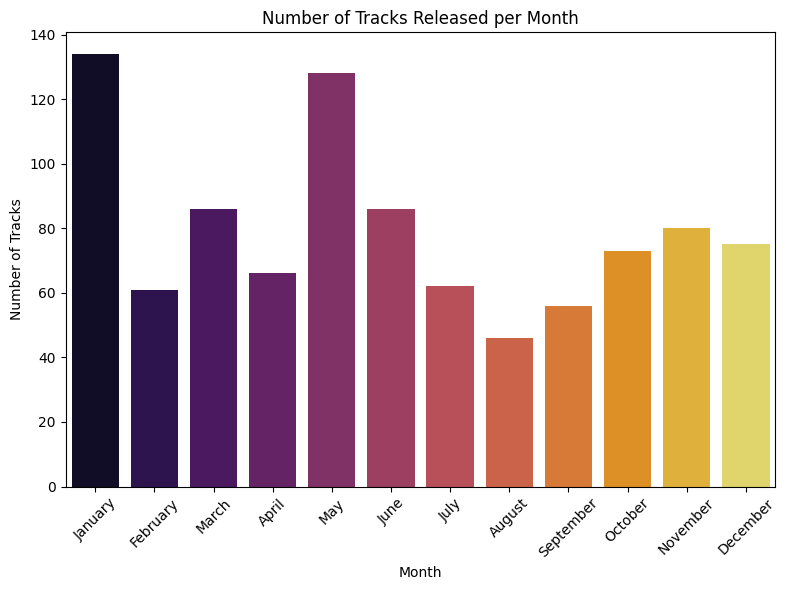

In [955]:
# Create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Count the number of tracks released per month
tracks_per_month = spotify_df['released_month'].value_counts().sort_index()

# Map the month numbers to month names for better readability
tracks_per_month.index = tracks_per_month.index.map(month_names)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=tracks_per_month.index, y=tracks_per_month.values, palette='inferno')

# Customize plot
plt.title('Number of Tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

---

### **5. Genre and Music Characteristics**

#### ***Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?***

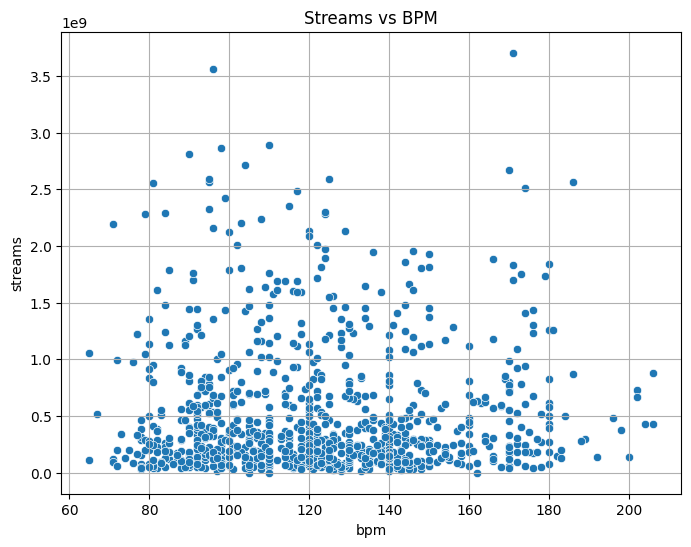

In [956]:
# Scatter plot for streams vs bpm with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['bpm'], y=spotify_df['streams'])
plt.title('Streams vs BPM')
plt.grid(True)  # Add grid lines
plt.show()

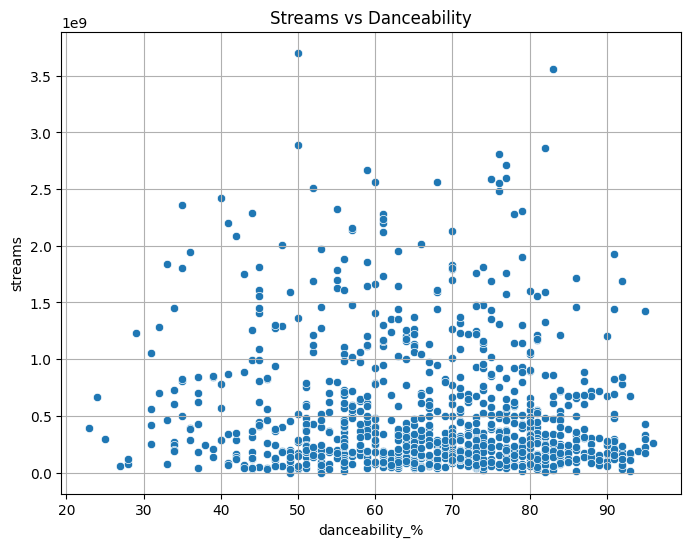

In [957]:
# Scatter plot for streams vs danceability_% with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['danceability_%'], y=spotify_df['streams'])
plt.title('Streams vs Danceability')
plt.grid(True)  # Add grid lines
plt.show()

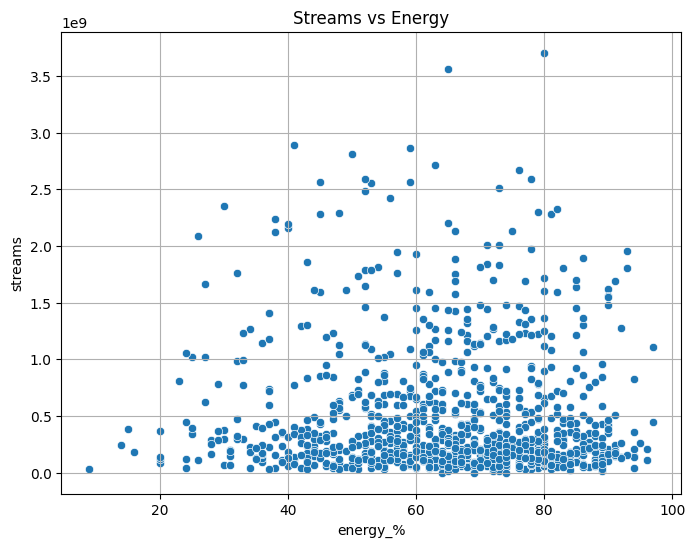

In [958]:
# Scatter plot for streams vs energy_% with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['energy_%'], y=spotify_df['streams'])
plt.title('Streams vs Energy')
plt.grid(True)  # Add grid lines
plt.show()

---

### **6. Platform Popularity**

#### ***How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?***

---

In [959]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

spotify_df = pd.read_csv("spotify_2023.csv", engine='python', encoding="ISO-8859-1")

---

### **1. Overview of the Dataset**

In [960]:
pd.pandas.set_option('display.max_columns', None) #"None" Removes the limit on how many columns can be shown
spotify_df.head() #Displays the first 5 rows of the dataframe

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


#### ***How many rows and columns does the dataset contain?***

In [961]:
num_rows, num_columns = spotify_df.shape #Returns the dimensions of the dataframe as a tuple
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 953
Number of Columns: 24


#### ***What are the data types of each column? Are there any missing values?***

##### **Data types of each column:**

In [962]:
print(spotify_df.dtypes) #Returns the data type of each column


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


##### **Number of missing values:**

In [963]:
missing_values = spotify_df.isnull().sum() #Counts missing values per column
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


**Converting to the Appropriate Data Type**

In [964]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce').fillna(0).astype(int) #Converts values in the 'streams' column to integers
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'], errors='coerce').fillna(0).astype(int) #Converts values in the 'in_deezer_playlists' column to integers
spotify_df['in_shazam_charts'] = pd.to_numeric(spotify_df['in_shazam_charts'], errors='coerce').fillna(0).astype(int) #Converts values in the 'in_shazam_charts' column to integers
print(spotify_df.dtypes) #Returns the data type of each column

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


**Dealing with Missing Values**

In [965]:
#Fill missing values in 'in_shazam_charts' column with the mean
imp = SimpleImputer(strategy='mean')
spotify_df['in_shazam_charts'] = imp.fit_transform(spotify_df['in_shazam_charts'].values.reshape(-1, 1))

# Fill missing values in 'key' column with the most frequent value and convert to 1D array
imp = SimpleImputer(strategy='most_frequent')
spotify_df['key'] = imp.fit_transform(spotify_df['key'].values.reshape(-1, 1)).ravel()
print(spotify_df.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


---

### **2. Basic Descriptive Statistics**

#### ***What are the mean, median, and standard deviation of the streams column?***

In [966]:
#Mean
mean_value = spotify_df['streams'].mean()
print(f"Mean: {mean_value:,}") #":," Adds commas as thousands separators to numbers

#Median
median_value = spotify_df['streams'].median()
print(f"Median: {median_value:,}")

#Standard Deviation
std_value = spotify_df['streams'].std()
print(f"Standard Deviation: {std_value:,}")

Mean: 513,597,931.3137461
Median: 290,228,626.0
Standard Deviation: 566,803,887.0588315


#### ***What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?***

##### **Distribution of Released Year:**

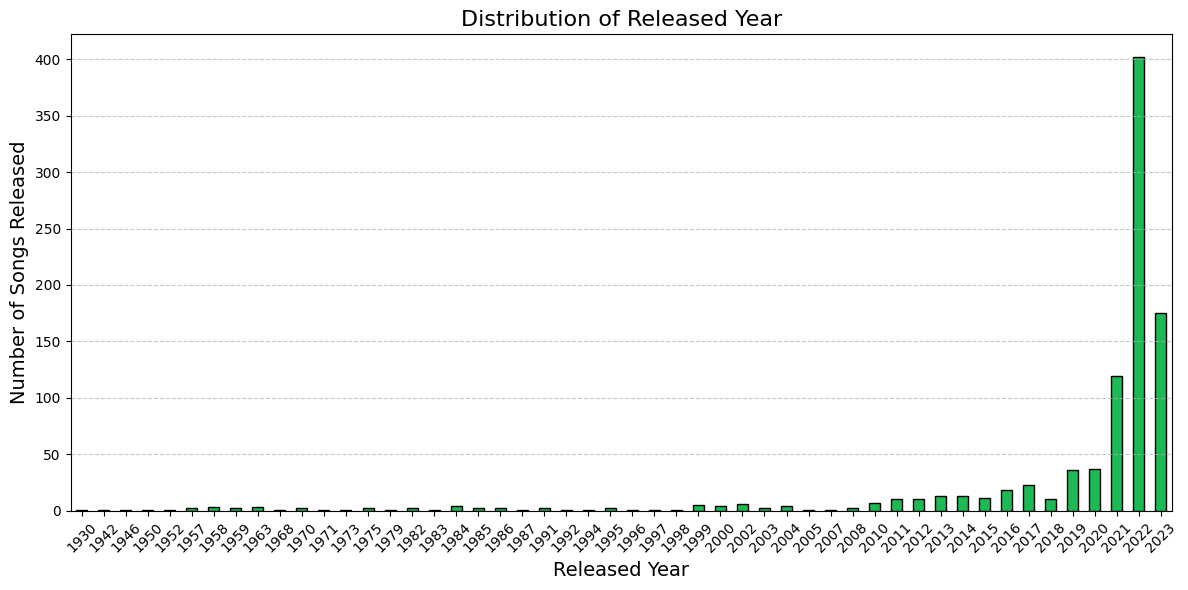

In [967]:
#Group by released_year and count the number of songs
d_released_year = spotify_df.groupby('released_year')['track_name'].count()

#Create the bar plot
plt.figure(figsize=(12, 6))
d_released_year.plot(kind='bar', color='#1DB954', edgecolor='black')

#Add labels and title
plt.xlabel('Released Year', fontsize=14) 
plt.ylabel('Number of Songs Released', fontsize=14)
plt.title('Distribution of Released Year', fontsize=16)

#Improve x-ticks visibility
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

#Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


##### **Distribution of Artist Count:**

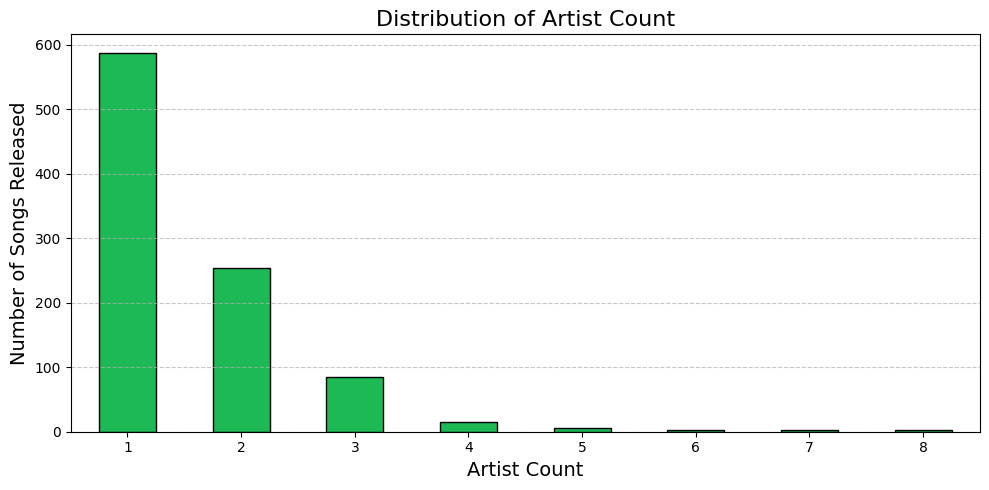

In [968]:
#Group by artist_count and count the number of songs
d_artist_count = spotify_df.groupby('artist_count')['track_name'].count()

#Create the bar plot
plt.figure(figsize=(10, 5))
d_artist_count.plot(kind='bar', color='#1DB954', edgecolor='black')

#Add labels and title
plt.xlabel('Artist Count', fontsize=14)
plt.ylabel('Number of Songs Released', fontsize=14)
plt.title('Distribution of Artist Count', fontsize=16)

#Improve x-ticks visibility
plt.xticks(rotation=360)  #Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  #Add gridlines for better readability

#Show the plot
plt.tight_layout()  #Adjust layout to prevent clipping of tick-labels
plt.show()

---

### **3. Top Performers**






#### ***Which track has the highest number of streams? Display the top 5 most streamed tracks.***

In [969]:
# Sort the DataFrame by the 'streams' column in descending order again
top_5_streamed_tracks = spotify_df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

# Display the top 5 most streamed tracks
print(top_5_streamed_tracks)    

                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

        streams  
55   3703895074  
179  3562543890  
86   2887241814  
620  2864791672  
41   2808096550  


#### ***Who are the top 5 most frequent artists based on the number of tracks in the dataset?*** 

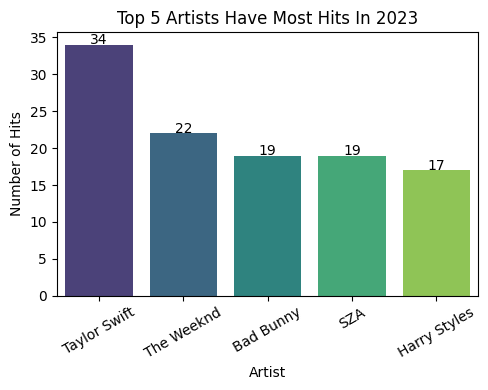

In [970]:
# Count the number of songs released by each artist
artist_counts = spotify_df['artist(s)_name'].value_counts()

# Select the top 5 artists
top_artists = artist_counts.head(5)

# Create the barplot
plt.figure(figsize=(5, 4))
ax = sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')

# Add exact numbers on top of each bar
for index, value in enumerate(top_artists.values):
    ax.text(index, value + .1, str(value), ha='center', fontweight='light')

# Customize plot
plt.title('Top 5 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=30)
plt.tight_layout()

# Show the plot
plt.show()

---

### **4. Temporal Trends** 

#### ***Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.*** 


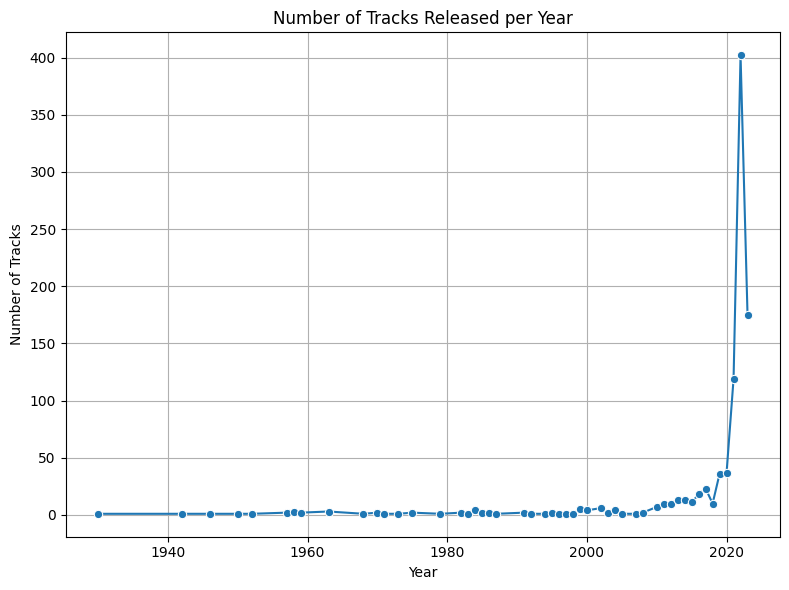

In [971]:
# Assuming the dataset is loaded into a DataFrame called spotify_df
# Count the number of tracks released per year
tracks_per_year = spotify_df['released_year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker='o')

# Customize plot
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

#### ***Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?***

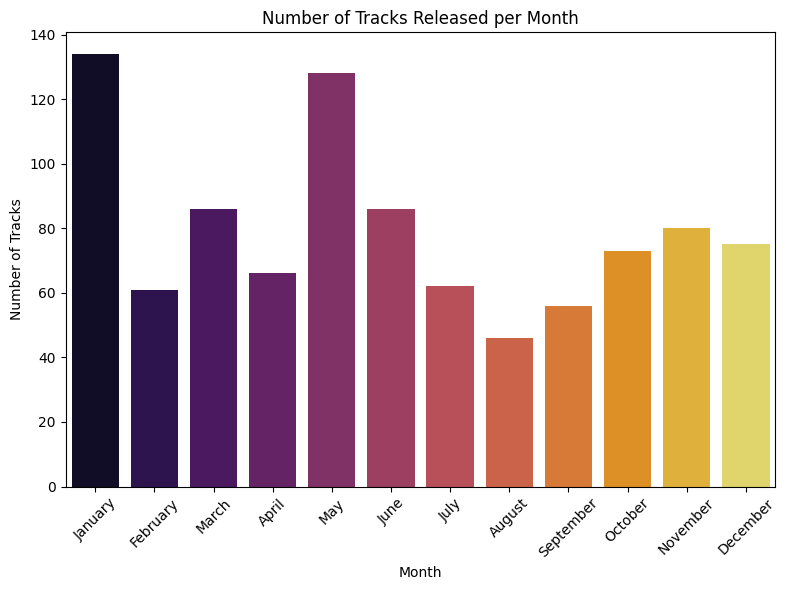

In [972]:
# Create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Count the number of tracks released per month
tracks_per_month = spotify_df['released_month'].value_counts().sort_index()

# Map the month numbers to month names for better readability
tracks_per_month.index = tracks_per_month.index.map(month_names)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=tracks_per_month.index, y=tracks_per_month.values, palette='inferno')

# Customize plot
plt.title('Number of Tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

---

### **5. Genre and Music Characteristics**

#### ***Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?***

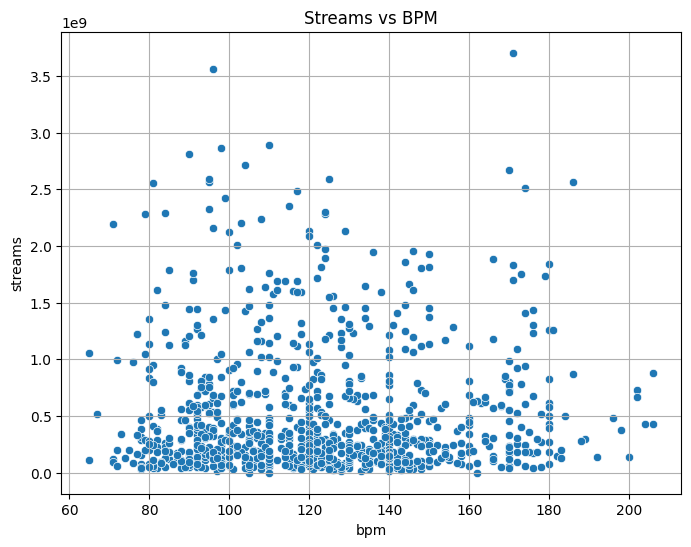

In [973]:
# Scatter plot for streams vs bpm with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['bpm'], y=spotify_df['streams'])
plt.title('Streams vs BPM')
plt.grid(True)  # Add grid lines
plt.show()

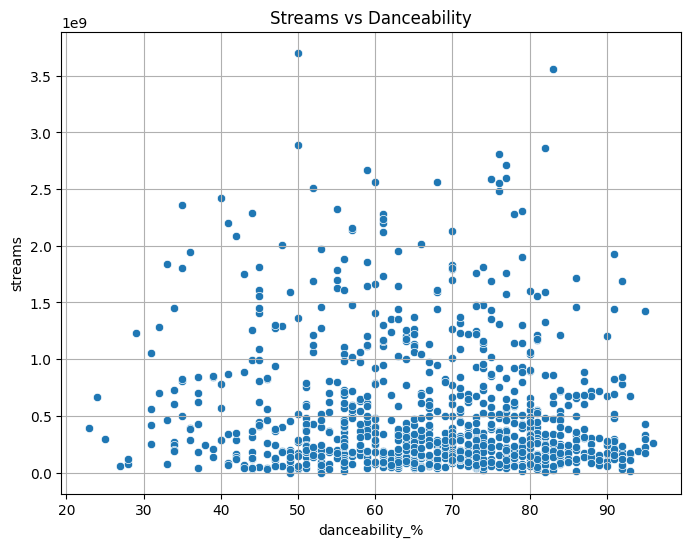

In [974]:
# Scatter plot for streams vs danceability_% with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['danceability_%'], y=spotify_df['streams'])
plt.title('Streams vs Danceability')
plt.grid(True)  # Add grid lines
plt.show()

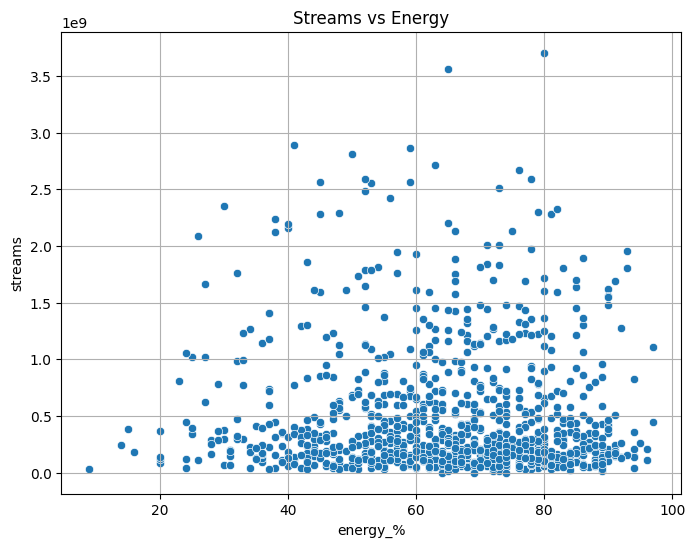

In [975]:
# Scatter plot for streams vs energy_% with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['energy_%'], y=spotify_df['streams'])
plt.title('Streams vs Energy')
plt.grid(True)  # Add grid lines
plt.show()

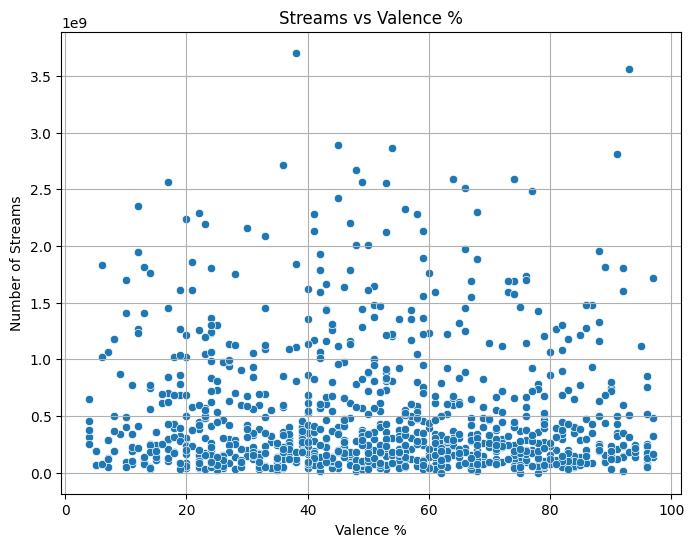

In [976]:
# Scatter plot for streams vs valence_% with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['valence_%'], y=spotify_df['streams'])
plt.title('Streams vs Valence %')
plt.grid(True)  # Add grid lines
plt.xlabel('Valence %')
plt.ylabel('Number of Streams')
plt.show()

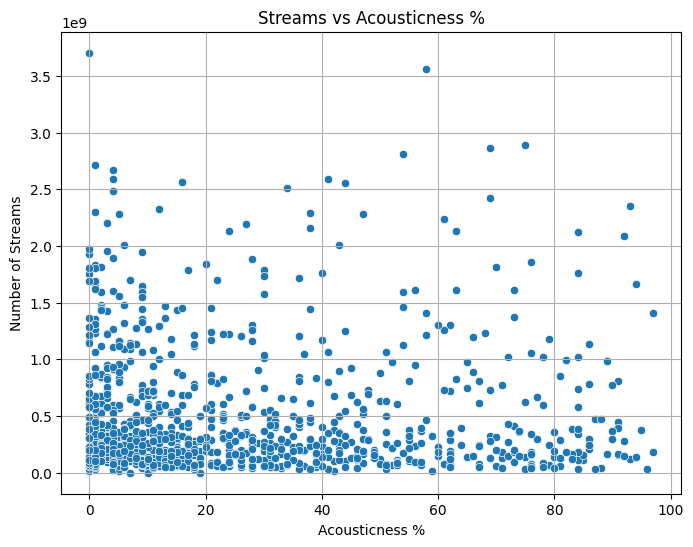

In [977]:
# Scatter plot for streams vs acousticness_% with grid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spotify_df['acousticness_%'], y=spotify_df['streams'])
plt.title('Streams vs Acousticness %')
plt.grid(True)  # Add grid lines
plt.xlabel('Acousticness %')
plt.ylabel('Number of Streams')
plt.show()

---

### **6. Platform Popularity**

#### ***How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?***

---


### **7. Advanced Analysis**


#### ***Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?***

Streams by Key:
    key          mean       median           sum  count
0    A  4.033902e+08  236060709.0   30254264458     75
1   A#  5.524754e+08  363467642.0   31491099814     57
2    B  5.193480e+08  322336177.0   42067184540     81
3   C#  5.675671e+08  311395144.0  122026917103    215
4    D  5.295256e+08  298063749.0   42891570295     81
5   D#  5.530365e+08  273194684.0   18250205825     33
6    E  5.774972e+08  284811322.5   35804825731     62
7    F  4.684464e+08  255120451.0   41691728620     89
8   F#  5.223632e+08  283359161.0   38132510024     73
9    G  4.525994e+08  251810759.0   43449542493     96
10  G#  4.769119e+08  288101651.0   43398979639     91

Streams by Mode:
     mode          mean       median           sum  count
0  Major  5.338604e+08  301938247.5  293623203541    550
1  Minor  4.859445e+08  273005485.0  195835625001    403


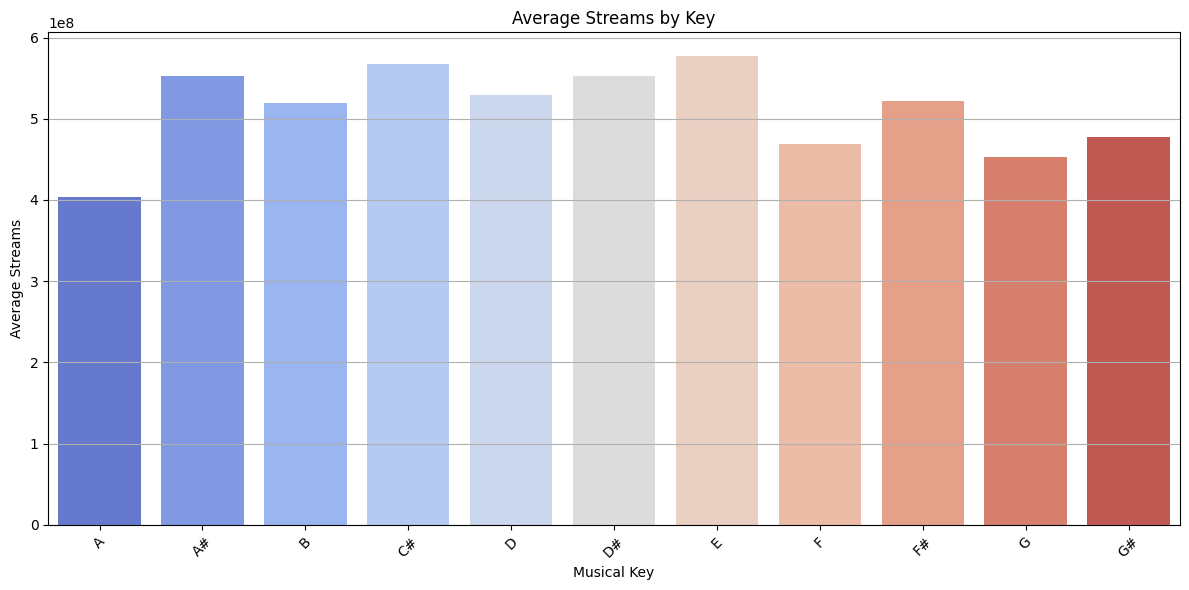

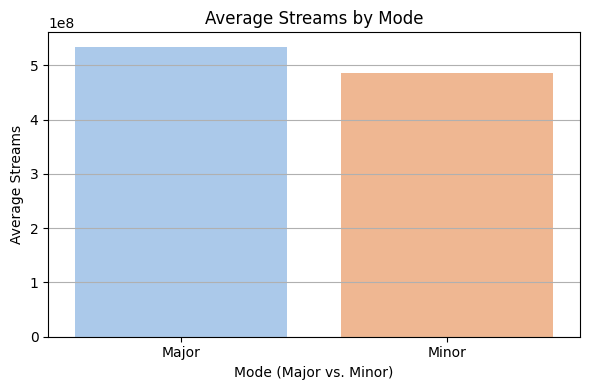

In [978]:
# Group by 'key' and calculate total streams
key_streams = spotify_df.groupby('key')['streams'].agg(['mean', 'median', 'sum', 'count']).reset_index()

# Group by 'mode' (Major vs. Minor) and calculate total streams
mode_streams = spotify_df.groupby('mode')['streams'].agg(['mean', 'median', 'sum', 'count']).reset_index()

# Print the aggregated data for keys and modes
print("Streams by Key:\n", key_streams)
print("\nStreams by Mode:\n", mode_streams)

# Visualize the patterns by key
plt.figure(figsize=(12, 6))
sns.barplot(x='key', y='mean', data=key_streams, palette='coolwarm')
plt.title('Average Streams by Key')
plt.xlabel('Musical Key')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Visualize the patterns by mode
plt.figure(figsize=(6, 4))
sns.barplot(x='mode', y='mean', data=mode_streams, palette='pastel')
plt.title('Average Streams by Mode')
plt.xlabel('Mode (Major vs. Minor)')
plt.ylabel('Average Streams')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### ***Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.***